In [4]:
import os

import librosa
import math
import cv2
import numpy

from PIL import Image
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


Base_dir='/Users/Desktop/Miniprj'
os.chdir(Base_dir)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
def imagepreprocess(image_folders_dir):
    Numpy_img_array=[];
    Label_array=[];
    os.chdir(image_folders_dir)
    for filename in os.listdir(image_folders_dir):
        if(filename!='.DS_Store'):
            print(filename)
            #print(Numpy_img_array)
            os.chdir(filename)
            for imgclass_file in os.listdir():
                #print("In for2 ",filename)
                if imgclass_file.endswith(('.jpg', '.png')):
                    #print('if check')
                    spctimg_highquality=cv2.imread(imgclass_file) #cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
                    spctimg=cv2.resize(spctimg_highquality,(45,45))
                    #spctimg=cv2.cvtColor(spctimg_color, cv2.COLOR_BGR2GRAY)
                    Numpy_img_array.append(spctimg)
                    Label_array.append(filename);
            os.chdir("..")
            print(os.getcwd())
    os.chdir("..") 
    return Numpy_img_array,Label_array

In [ ]:

def Conv_Neural_Net(x_train,y_train,x_test,y_test):
    #x_train=Image_Data
    #y_train=Label_Data
    
    #create model
    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=(45,45,3)))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Flatten())
    model.add(Dense(15, activation='softmax'))
    
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    #train the model
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
    return model

In [ ]:
 def Dataset_organise(Image_Data_list,Label_Data):
    Image_Data=numpy.stack(Image_Data_list, axis=0 )
    #Image_Data_list=0; ###Clearing the variable to save space in disk

    encoder = LabelEncoder()
    Label_Data_enc = encoder.fit_transform(Label_Data)


    randomize = numpy.arange(len(Image_Data))
    numpy.random.shuffle(randomize)
    Image_Data = Image_Data[randomize]
    Label_Data_enc = Label_Data_enc[randomize]

    Image_Data_Train=Image_Data[:math.ceil(len(Image_Data)*0.8)]
    Image_Data_Test=Image_Data[math.ceil(len(Image_Data)*0.8):len(Image_Data)]


    Label_Data_Train=Label_Data_enc[:math.ceil(len(Label_Data_enc)*0.8)]
    Label_Data_Test=Label_Data_enc[math.ceil(len(Label_Data_enc)*0.8):len(Label_Data_enc)]

    #Image_Data=0; ###Clearing the variable to save space in disk
    
    return Image_Data_Train,Image_Data_Test,Label_Data_Train,Label_Data_Test

In [ ]:
#def predictions()

In [ ]:
#main
os.chdir(Base_dir)
image_folders_dir='/Users/Desktop/Miniprj/instrumentsamp'

[Image_Data_list,Label_Data]=imagepreprocess(image_folders_dir)

In [ ]:
[Image_Data_Train,Image_Data_Test,Label_Data_Train,Label_Data_Test]=Dataset_organise(Image_Data_list,Label_Data)

In [ ]:
instrumentclassificationmodel=Conv_Neural_Net(Image_Data_Train,Label_Data_Train,Image_Data_Test,Label_Data_Test)

Train on 3276 samples, validate on 819 samples
Epoch 1/10
3276/3276 [==============================] - 8s 3ms/step - loss: 372.7879 - accuracy: 0.2637 - val_loss: 1.5617 - val_accuracy: 0.5055
Epoch 2/10
3276/3276 [==============================] - 8s 2ms/step - loss: 1.1383 - accuracy: 0.6606 - val_loss: 0.8597 - val_accuracy: 0.7326
Epoch 3/10
3276/3276 [==============================] - 8s 3ms/step - loss: 0.6277 - accuracy: 0.8046 - val_loss: 0.5835 - val_accuracy: 0.8327
Epoch 4/10
3276/3276 [==============================] - 8s 3ms/step - loss: 0.4073 - accuracy: 0.8736 - val_loss: 0.4226 - val_accuracy: 0.8803
Epoch 5/10
3276/3276 [==============================] - 8s 3ms/step - loss: 0.2922 - accuracy: 0.9072 - val_loss: 0.4294 - val_accuracy: 0.8791
Epoch 6/10
3276/3276 [==============================] - 8s 2ms/step - loss: 0.2105 - accuracy: 0.9359 - val_loss: 0.3164 - val_accuracy: 0.9243
Epoch 7/10
3276/3276 [==============================] - 8s 3ms/step - loss: 0.1684 - ac

In [ ]:
predictions = instrumentclassificationmodel.predict_classes(Image_Data_Test)
predictions

array([ 0,  7,  5,  7, 10, 13,  2,  7,  1, 12,  1, 13,  7,  4, 10,  3,  5,
        4,  1,  4,  2,  1, 10,  1,  2,  4,  9,  4,  2,  3, 10, 10, 13, 11,
        0, 10,  1, 12, 12,  7,  1,  7,  7,  1,  1,  1,  6,  4,  8,  1,  2,
       13,  5,  9, 10,  7, 12, 10,  0,  1,  2, 11,  2,  4,  6,  4, 11, 10,
       11, 10,  1,  1,  7,  1,  1,  5,  1, 10, 12,  0,  9, 12, 10,  7,  9,
        2, 12, 10, 10, 12,  7,  7,  7,  0,  4, 12,  6,  4,  9,  1,  1,  4,
        4,  3,  1,  4, 12,  4,  8,  5,  4,  7,  0, 12,  4, 10,  7,  7,  3,
        3,  8,  5,  7,  5,  1,  7,  8, 11,  7,  0, 10,  0, 12, 12,  1,  1,
        1,  9,  4, 13,  9,  4, 10,  7,  1,  4,  4,  0,  7,  7,  7,  1, 10,
        4, 10, 10,  1,  1, 11,  9,  1,  1,  7, 10,  2,  4, 10,  7,  7,  2,
        7,  7,  1,  3, 12,  4, 13,  1, 10,  7,  4,  5,  7,  4,  1, 11, 10,
        2,  2,  0,  2,  4,  7,  3, 13,  7,  1, 10,  7,  0,  0,  1,  7,  0,
        1, 12,  7,  4,  9,  6, 11, 10, 10,  0,  7,  5, 12,  7, 13,  1,  1,
       11, 10,  7,  0, 12

In [ ]:
C=confusion_matrix(Label_Data_Test, predictions)

In [ ]:
#Image_Data_Train,Label_Data_Train,Image_Data_Test,Label_Data_Test

In [ ]:
C

array([[ 55,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0],
       [  0, 125,   0,   0,   2,   0,   0,   5,   0,   0,   0,   0,   0,
          0],
       [  0,   0,  40,   0,   0,   1,   0,   2,   0,   0,   0,   0,   0,
          0],
       [  2,   0,   0,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   6,   0,   0,  86,   0,   0,   6,   0,   1,   2,   0,   0,
          1],
       [  0,   0,   0,   0,   0,  38,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   2,   0,   0,   0,   0,  16,   2,   0,   0,   2,   0,   0,
          0],
       [  1,   0,   0,   0,   1,   0,   1,  93,   0,   0,   2,   0,   1,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  17,   0,   0,   0,   0,
          0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  38,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,  97,   0,   1,
          0],
       [ 11,   1,   0,   1,   0,   0,   0, 

In [ ]:
K=((C / C.astype(numpy.float).sum(axis=1))*100)
K

array([[ 98.21428571,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.01010101,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  94.6969697 ,   0.        ,   0.        ,
          1.96078431,   0.        ,   0.        ,   5.05050505,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  93.02325581,   0.        ,
          0.        ,   2.63157895,   0.        ,   2.02020202,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  3.57142857,   0.        ,   0.        ,  93.75      ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   4.54545455,   0.        ,   0.        ,
         84.31372549

In [ ]:
for i in range (14):
    print(K[i][i])

88.52459016393442
97.24137931034483
96.42857142857143
92.85714285714286
90.81632653061224
96.66666666666667
75.0
90.0
100.0
89.74358974358975
94.4954128440367
93.18181818181817
94.82758620689656
70.37037037037037


In [ ]:
Image_Data_Test.shape

(819, 45, 45, 3)

In [ ]:
def prediction_spectrum_extract(audio_file):
    cmap = plt.get_cmap('inferno')
    y, sr = librosa.load(audio_file, mono=True,duration=20)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'/Users/Desktop/Miniprj/CNN_Prediction_features/{audio_file[:-3].replace(".", "")}.png')

In [ ]:
def prediction_features(audiofile_path):
    old_dir=os.getcwd()
    os.chdir(audiofile_path)
    audio_file=input()
    prediction_spectrum_extract(audio_file)
    prediction_cv2_image=f'/Users/Desktop/Miniprj/CNN_Prediction_features/{audio_file[:-3]}.png'
    spctimg_highquality=cv2.imread(prediction_cv2_image) #cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
    spctimg=cv2.resize(spctimg_highquality,(45,45))
    processed_image_prediction=numpy.stack(spctimg, axis=0 )
    os.chdir(old_dir)
    return processed_image_prediction

In [ ]:
audio_file_prediction_path=input('Give Pediction file path')

In [ ]:
processed_image_prediction=prediction_features(audio_file_prediction_path)

In [ ]:
spectrum_prediction[2]

In [ ]:
k=os.path.realpath('Miniprj')

In [ ]:
predictions = instrumentclassificationmodel.predict_classes(Image_Data_Test)

In [ ]:
print(predictions[5])


3


In [ ]:
print(Label_Data_Test[5])

3


In [ ]:
print('The instruments given for predicitons are:')
for i in Label_Data_Test[2:3]:#predictions:
    if(i==0):
        print('Piano')
    elif(i==1):
        print('Flute')
    elif(i==2):
        print('Harmonium')
    elif(i==3):
        print('Sarod')
    elif(i==4):
        print('Shankha')
    elif(i==5):
        print('Sitar')
    elif(i==6):
        print('Veena')
    elif(i==7):
        print(' Violin')    

The instruments given for predicitons are:
Sarod


In [ ]:
print("These were the following predicitons")
for i in predictions[2:3]:#predictions:    
    if(i==0):
        print('Piano')
    elif(i==1):
        print('Flute')
    elif(i==2):
        print('Harmonium')
    elif(i==3):
        print('Sarod')
    elif(i==4):
        print('Shankha')
    elif(i==5):
        print('Sitar')
    elif(i==6):
        print('Veena')
    elif(i==7):
        print(' Violin')    

These were the following predicitons
Sarod


In [ ]:
k=Label_Data_Test-predictions

In [ ]:
for i in k:#predictions:
    print(i, end =" ")
    if(i==0):
        print('Piano')
    elif(i==1):
        print('Flute')
    elif(i==2):
        print('Harmonium')
    elif(i==3):
        print('Sarod')
    elif(i==4):
        print('Shankha')
    elif(i==5):
        print('Sitar')
    elif(i==6):
        print('Veena')
    elif(i==7):
        print(' Violin')    

0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
2 Harmonium
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Piano
0 Pi

In [ ]:
len(k)

1202

TypeError: float() argument must be a string or a number, not 'Wave_read'

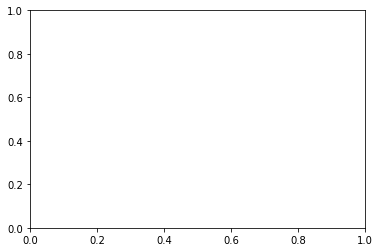

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open(r"D:\carnatic\2_Violin\wav\segment\segmentGanesh & Kumaresh - Kamakshi.wav6.wav", "r")
plt.plot(spf)
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()

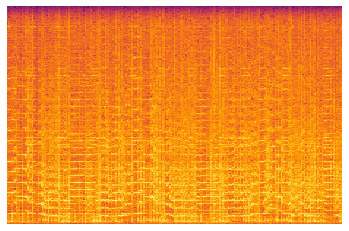

In [8]:
cmap = plt.get_cmap('inferno')
y, sr = librosa.load(r"D:\carnatic\2_Violin\wav\segment\segmentGanesh & Kumaresh - Kamakshi.wav6.wav", mono=True,duration=20)
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');
#plt.savefig(f'D:\carnatic\2_Violin\wav\segment/{[:-3].replace(".", "")}.png')

In [1]:
import libarosa

ModuleNotFoundError: No module named 'libarosa'

In [2]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import os